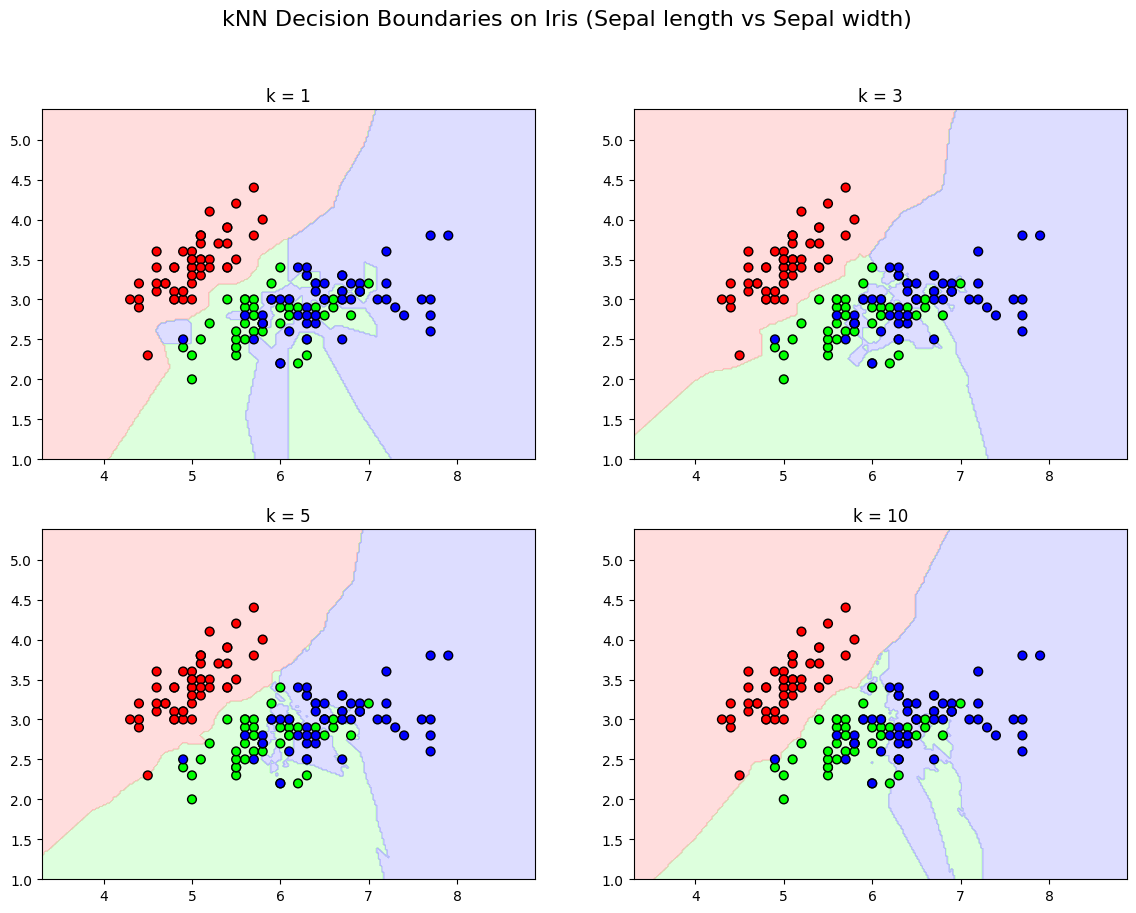

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

# 1. Load Iris dataset (only 2 features)
iris = datasets.load_iris()
X = iris.data[:, :2]   # sepal length, sepal width
y = iris.target

# Mesh grid setup for plotting boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Different k values
ks = [1, 3, 5, 10]

plt.figure(figsize=(14, 10))

for i, k in enumerate(ks, 1):
    # 2. Train kNN
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)

    # 3. Predict decision boundaries
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    # Plot
    plt.subplot(2, 2, i)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=40)
    plt.title(f"k = {k}")

plt.suptitle("kNN Decision Boundaries on Iris (Sepal length vs Sepal width)", fontsize=16)
plt.show()
